In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
lending_club = pd.read_csv("loan/loan_workingcopy_ipynb.csv")
lending_club_1 = pd.read_csv("loan/loan_workingcopy_ipynb.csv")

### Distribution of loan amount

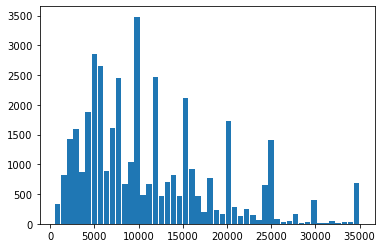

In [24]:
plt.hist(lending_club['loan_amnt'], rwidth=0.9, bins=50)
plt.show()

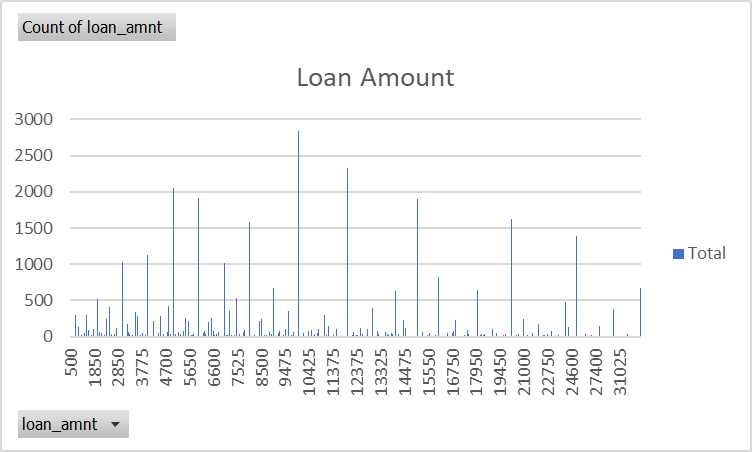

### Box plot to view outliers for loan amount requested by borrowers

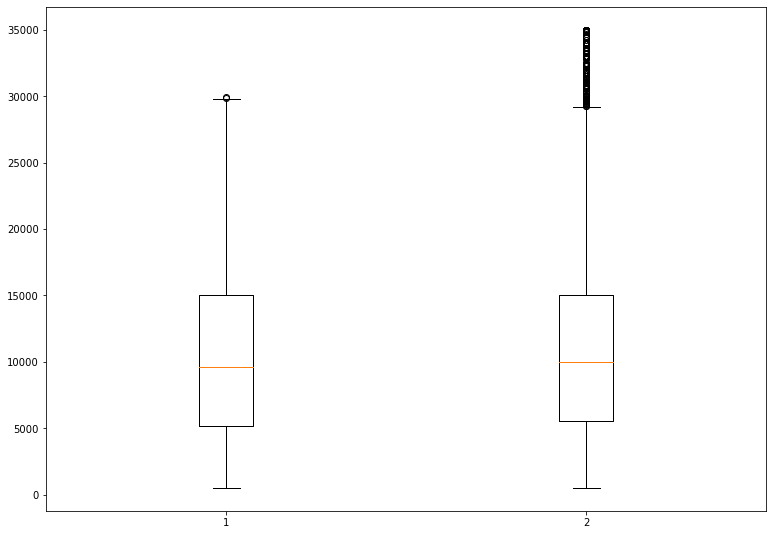

Number of outliers  (828, 48)


In [25]:
loan_amount_data = [lending_club[lending_club['loan_amnt'] < 30000].loan_amnt, lending_club['loan_amnt']]
loan_amount_fig = plt.figure(figsize =(10, 7))
ax = loan_amount_fig.add_axes([0,0,1,1])
ax.boxplot(loan_amount_data)
plt.show()
print("Number of outliers ",lending_club[lending_club['loan_amnt'] > 30000].shape)


It is evident that the loan amount is ranged between <b>5000 and 15000</b> i.e the 1st quartile and the 3rd quartile respectively with an inter quartile range of <b>10000</b> and the maximum amount is closer to <b>30000</b> and the minimum loan amount is closer to <b>1000</b>. The box plot confirms that outliers are present for loan amount above <b>30000</b> that are <b>828 rows/loan accounts</b>.

In [50]:
lending_club = lending_club[lending_club['loan_amnt'] < 30000]

### Distribution of amount funded by investors

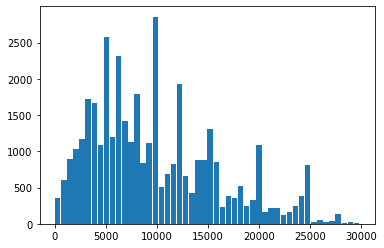

In [51]:
plt.hist(lending_club['funded_amnt_inv'], rwidth=0.9, bins=50)
plt.show()

### Box plot to view outliers for loan amount funded by investors

<AxesSubplot:>

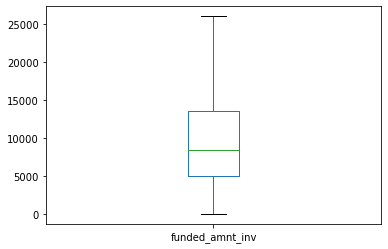

In [54]:
lending_club[lending_club['funded_amnt_inv'] < 26000].boxplot(column =['funded_amnt_inv'], grid=False)

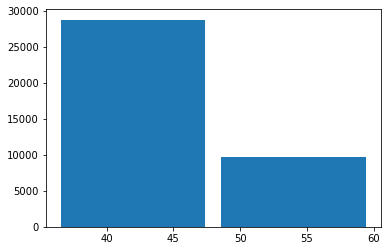

In [74]:
plt.hist(lending_club['term_in_months'], rwidth=0.9, bins=2, label=[])
plt.show()

In [67]:
lending_club_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0,0.0


In [184]:
lending_club_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term_in_months              39717 non-null  int64  
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [185]:
lending_club_1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term_in_months                    0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                     

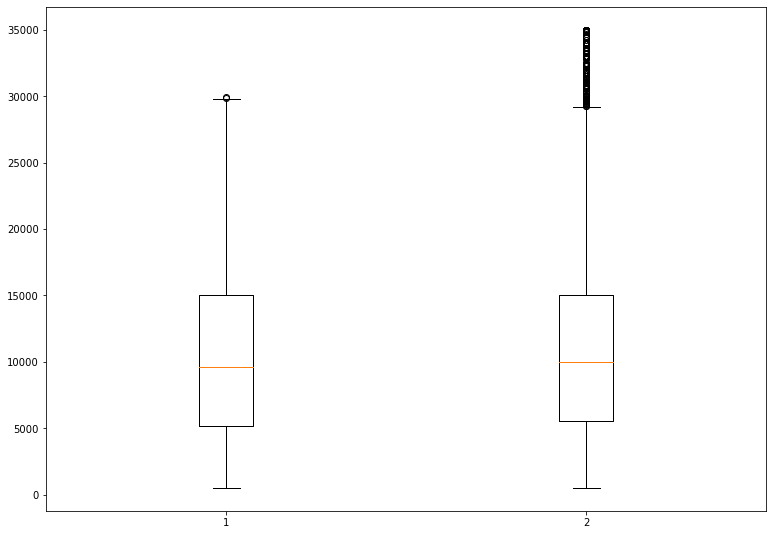

Number of outliers  (828, 48)


In [70]:
loan_amount_data = [lending_club_1[lending_club_1['loan_amnt'] < 30000].loan_amnt, lending_club_1['loan_amnt']]
loan_amount_fig = plt.figure(figsize =(10, 7))
ax = loan_amount_fig.add_axes([0,0,1,1])
ax.boxplot(loan_amount_data)
plt.show()
print("Number of outliers ",lending_club_1[lending_club_1['loan_amnt'] > 30000].shape)

In [193]:
print(lending_club_1.shape)
lending_club_1 = lending_club_1.drop(lending_club_1[lending_club_1['loan_amnt'] >= 30000].index)
print(lending_club_1.shape)

(38889, 48)
(38512, 48)


In [194]:
def normalise_loan_amnt(loan_amount):
    if loan_amount >= 500 and loan_amount < 5500:
        return "Low"
    elif loan_amount >= 5500 and loan_amount < 10000:
        return "Medium"
    elif loan_amount >= 10000 and loan_amount < 15000:
        return "High"
    elif loan_amount >= 15000:
        return "Very High"

lending_club_1["loan_amnt"] = lending_club_1["loan_amnt"].apply(lambda x: normalise_loan_amnt(x))

In [195]:
lending_club_1["loan_amnt"]

0           Low
1           Low
2           Low
3          High
4           Low
          ...  
39712       Low
39713    Medium
39714       Low
39715       Low
39716    Medium
Name: loan_amnt, Length: 38512, dtype: object

In [196]:
lending_club_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38512 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38512 non-null  int64  
 1   member_id                   38512 non-null  int64  
 2   loan_amnt                   38512 non-null  object 
 3   funded_amnt                 38512 non-null  int64  
 4   funded_amnt_inv             38512 non-null  float64
 5   term_in_months              38512 non-null  int64  
 6   int_rate                    38512 non-null  object 
 7   installment                 38512 non-null  float64
 8   grade                       38512 non-null  object 
 9   sub_grade                   38512 non-null  object 
 10  emp_length                  37454 non-null  object 
 11  home_ownership              38512 non-null  object 
 12  annual_inc                  38512 non-null  float64
 13  verification_status         385

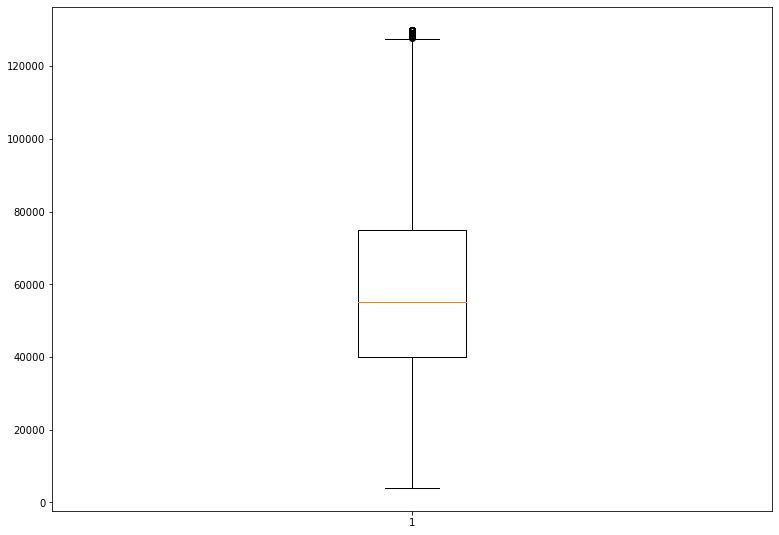

In [197]:
annual_income_data = lending_club_1[lending_club_1['annual_inc'] < 130000].annual_inc
annual_income_fig = plt.figure(figsize =(10, 7))
ax = annual_income_fig.add_axes([0,0,1,1])
ax.boxplot(annual_income_data)
plt.show()

In [198]:
lending_club_1 = lending_club_1.drop(lending_club_1[lending_club_1['annual_inc'] >= 130000].index)
lending_club_1.shape

(36149, 48)

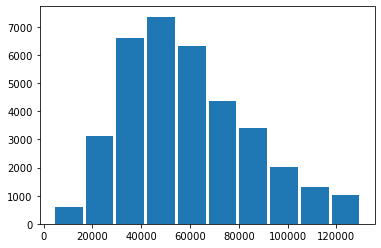

In [199]:
plt.hist(lending_club_1.annual_inc, rwidth=0.9)
plt.show()


In [200]:
lending_club_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36149 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          36149 non-null  int64  
 1   member_id                   36149 non-null  int64  
 2   loan_amnt                   36149 non-null  object 
 3   funded_amnt                 36149 non-null  int64  
 4   funded_amnt_inv             36149 non-null  float64
 5   term_in_months              36149 non-null  int64  
 6   int_rate                    36149 non-null  object 
 7   installment                 36149 non-null  float64
 8   grade                       36149 non-null  object 
 9   sub_grade                   36149 non-null  object 
 10  emp_length                  35111 non-null  object 
 11  home_ownership              36149 non-null  object 
 12  annual_inc                  36149 non-null  float64
 13  verification_status         361

Segmentation of Revolving Utilisation

In [208]:
lending_club_1["revol_util"] = pd.to_numeric(lending_club_1["revol_util"])

ValueError: Unable to parse string "83.70%" at position 0

In [207]:
def revol_util_segment(x):
    if x <= 5:
        return "Extremely Good"
    elif (x > 5) & (x <= 30):
        return "Good"
    elif (x > 30) & (x <= 50):
        return "Moderate"
    elif (x > 50) & (x <= 70):
        return "Risky"
    elif x > 70:
        return "Extremely Risky"

In [206]:
# def remove_pcr(x):
#     return x[0:-1]
lending_club_1["revol_util"].apply(lambda x: revol_util_segment(x))

TypeError: 'float' object is not subscriptable

In [182]:
lending_club_1["revol_util"][0:100]

0      83.70%
1       9.40%
2      98.50%
3         21%
4      53.90%
        ...  
98     13.40%
99        50%
100    47.70%
101    87.10%
102    36.80%
Name: revol_util, Length: 100, dtype: object